In [1]:
#from scipy import signal
#from signal import find_peaks, butter, filtfilt
from scipy.signal import find_peaks, butter, filtfilt
%matplotlib inline 
import time
import matplotlib.pyplot as plt
import skimage as ski
import numpy as np
import cv2

# Camera resolution
res = (389, 223)

CAMERA_CENTER = res[0] // 2
       
from pwm import PWM

In [13]:
f = cv2.imread('img/4.png')
gray = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, thresh=190, maxval=255, type=cv2.THRESH_BINARY)
gray = cv2.bitwise_and(gray, mask)

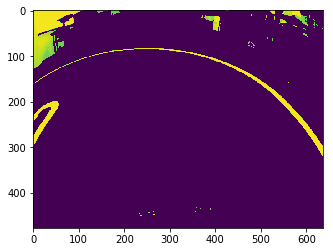

In [9]:
plt.imshow(gray)
plt.show()

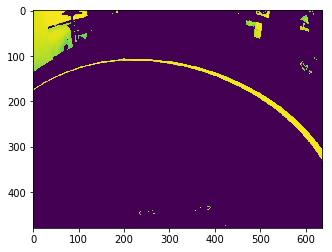

p (array([597]), {'peak_heights': array([270.72835749])})
left lane None
right lane 597
turn: -103
297 [597]


In [14]:
# To filter the noise in the image we use a 3rd order Butterworth filter

# Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
b, a = butter(3, 0.1)

line_pos = CAMERA_CENTER


# Get the intensity component of the image (a trick to get black and white images)
#I = f[:, :, 0]
I = gray



plt.imshow(I)
plt.show()
# plt.imshow(I, interpolation='nearest')
# plt.show()


# Select a horizontal line in the middle of the image
L = I[270, :]

# Smooth the transitions so we can detect the peaks 
Lf = filtfilt(b, a, L)

# Find peaks which are higher than 0.5
p = find_peaks(Lf, height=160)
print("p",p)
peaks = p[0]
#print("peaks",peaks)
line_left   = None
line_right  = None
peaks_left  = peaks[peaks < CAMERA_CENTER]
peaks_right = peaks[peaks > CAMERA_CENTER]

if peaks_left.size:
    line_left = peaks_left.max()

if peaks_right.size:
    line_right = peaks_right.min()
        
print("left lane", line_left)
print("right lane", line_right)

if line_left and line_right:
    line_pos    = (line_left + line_right ) // 2
    track_width = line_right - line_left
    print("track_width: ", track_width)
        
elif line_left and not line_right:
    print('only left lane')
    line_pos    = line_left + int(track_width / 2)
        
    
elif not line_left and line_right:
    line_pos    = line_right - int(track_width / 2)
        
else:
    print("no line")
        
        
turn = CAMERA_CENTER - line_pos
print("turn:", turn)
print(line_pos, peaks)